# <span style="color:lightblue">DATA SCIENCE AND MACHINE LEARNING INTERNSHIP PROGRAM</span>
<h2><center>Mini Project 2 - Consumer Compliant Resolution<br>Analysis Using Python</center><h2>

### **<span style="color:lightblue">**Scenario:**</span>**
Product review is the most basic funciton/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer.

When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try thier best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.

So here, we will analyse data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

### **<span style="color:lightblue">**Object:**</span>**
Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output.

The main objective is to predict whether our customer is disputed or not with the help of given data

### **<span style="color:lightblue">**Dataset description:**</span>**
Customers faced some issues and tried to report their problems to customer care.

Dispute: This is our target variable based on training data; we have two groups, one with a dispute with the bank and another don't have any issue with the bank.

Date received: The day complaint was received.

Product: different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services and money-related)

Sub-product: loan, insurance, other mortgage options

Issue: Complaint of customers

Company public response: Company's response to consumer complaint

Company: Company name

State: State where the customer lives (different state of USA)

ZIP code: Where the customer lives

Submitted via: Register complaints via different platforms (online web, phone, referral, fax, post mail)

Date sent to company: The day complaint was registered

Timely response?:Yes/no

Consumer disputed?:yes/no (target variable)

Complaint ID: unique to each consumer

### **<span style="color:lightblue">**Tasks to be performed:**</span>**
The following tasks would be performed:

**Note:** Complete the steps on both train and test data
* Read the Data from the Given excel file.
* Check the data type for both data (test file and train file)
* Do missing value analysis and drop columns where more than 25% of data are missing
* Extracting Day, Month, and Year from Date Received Column and create new fields for da month, year, and day
* Calculate the Number of Days the Complaint was with the Company and create a new field as "Days held"
* Drop "Date Received", "Date Sent to Company", "ZIP Code", "Complaint ID", fields
* Imputing Null value in "State" by Mode
* with the help of the days we calculated above, create a new field "Week_Received" where we calculate the week based on the day of receiving
* store data of disputed people into the "disputed_cons" variable for future tasks
* plot bar graph of the total no of disputes of customers with the help of seaborn
* plot bar graph of the total no of disputes products-wise with the help of seaborn
* plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn
* Plot bar graph of the total no of disputes by State with Maximum Disputes
* Plot bar graph of the total no of disputes Submitted Via different source
*  Plot bar graph of the total no of disputes where the Company's Response to the
Complaints
* Plot bar graph of the total no of disputes where the Company's Response Leads to
Disputes
* Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely
Response
* Plot bar graph of the total no of disputes over Year Wise Complaints
* Plot bar graph of the total no of disputes over Year Wise Disputes
* Plot bar graph of Top Companies with Highest Complaints
* Convert all negative days held to zero (it is the time taken by the authority that can't be
negative)
* Drop Unnecessary Columns for the Model Building
like:'Company', 'State', 'Year_Received', 'Days_held'
* Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
* Create Dummy Variables for categorical features and concat with the original data frame
like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'
* Scaling the Data Sets (note: discard dependent variable before doing standardization)
and Make feature Selection with the help of PCA up to 80% of the information.
* Splitting the Data Sets Into X and Y by the dependent and independent variables (data
selected by PCA)
* Build given models and measure their test and validation accuracy:
    - LogisticRegression
    - DecisionTreeClassifier
    - RandomForestClassifier
    - AdaBoostClassifier
    - GradientBoostingClassifier
    - KNeighborsClassifier
    - XGBClassifier
* Whoever gives the most accurate result uses it and predicts the outcome for the test file
and fills its dispute column so the business team can take some action accordingly.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load given datasets

In [2]:
cc_test_df = pd.read_csv("./Data/Mini_Project2/Consumer_Complaints_test.csv")
cc_train_df = pd.read_csv("./Data/Mini_Project2/Consumer_Complaints_train.csv")

Print top 5 records of train dataset

In [3]:
cc_train_df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [4]:
cc_train_df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [5]:
cc_train_df.shape, cc_test_df.shape

((358810, 18), (119606, 17))

Print columns of train and test datasets

In [6]:
print(f"""
columns of the training set:
{cc_train_df.columns}


columns of the test set:
{cc_test_df.columns}
""")


columns of the training set:
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


columns of the test set:
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')



Check data type for both datasets

In [7]:
cc_train_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [8]:
cc_test_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

Print missing values in percentage

In [9]:
#for training dataset
print(f"""
Missing values for the training dataset:
{cc_train_df.isna().sum()/len(cc_train_df) * 100}

Missing values for the test dataset:
{cc_test_df.isna().sum()/len(cc_test_df) * 100}
""")


Missing values for the training dataset:
Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

Missing values for the test dataset:
Date received                    0.000000
Product                          0.000000
Sub-product                     28.997709
Issue                  

In [10]:
# train_dropped_columns, test_dropped_columns

Drop columns where more than 25% of the data are missing.

In [11]:
def drop_columns(dataFrame, dropped_column=None):
    """
    Custom function just for the task of getting conditional list of columns to be dropped, maybe modified later if necessary
    takes a dataframe, and list of columns to be dropped is returned

    After modification:
    if dropped_column is not empty, a new data frame with the dropped_column is returned
    """
    df = dataFrame.copy()
    columns_to_drop=[]
    for column in df.columns:
        if (df[column].isna().sum()/len(df[column])) > 0.25:
            # print(f"True{column}")
            # print("column is supposed to be appended")
            columns_to_drop.append(column)
        # print(columns_to_drop)
    return columns_to_drop


In [12]:
# #Getting the columns where more than 25% of the data is missing
train_dropped_columns = drop_columns(cc_train_df.copy())
test_dropped_columns = drop_columns(cc_test_df.copy())
# #dropping columns where more than 25% of the data is missing
cc_train_df.drop(columns=train_dropped_columns, axis=1, inplace=True)
cc_test_df.drop(columns=train_dropped_columns, axis=1, inplace=True)

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [13]:
cc_test_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [14]:
# cc_train_df["Year_Received"] = cc_train_df["Date received"]
# cc_test_df["Year_Received"] = cc_test_df["Date received"]

Convert dates from object type to datetime type

In [15]:
#converting the dtype of the column to datetime to easily extract the date info from it
cc_train_df["Date received"] = pd.to_datetime(cc_train_df["Date received"])
cc_test_df["Date received"] = pd.to_datetime(cc_test_df["Date received"])

def extract_date_info(df):
    df["Year"] = pd.DatetimeIndex(df["Date received"]).year
    df["Month"] = pd.DatetimeIndex(df["Date received"]).month
    df["Day"] = pd.DatetimeIndex(df["Date received"]).day

extract_date_info(cc_train_df)
extract_date_info(cc_test_df)

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [16]:
cc_train_df.head(3)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20


In [17]:
cc_train_df["Date sent to company"] = pd.to_datetime(cc_train_df["Date sent to company"])
cc_test_df["Date sent to company"] = pd.to_datetime(cc_test_df["Date sent to company"])
cc_train_df["days_held"] = (cc_train_df["Date sent to company"] - cc_train_df["Date received"])
cc_test_df["days_held"] = (cc_test_df["Date sent to company"] - cc_train_df["Date received"])

Convert "Days Held" to Int(above column)

In [18]:
#converting days held to in
cc_train_df["days_held"] = cc_train_df["days_held"].dt.days
cc_test_df["days_held"] = cc_test_df["days_held"].dt.days

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [19]:
cc_train_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Year',
       'Month', 'Day', 'days_held'],
      dtype='object')

In [20]:
cc_test_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Year', 'Month', 'Day',
       'days_held'],
      dtype='object')

In [22]:
drop_column = ["Date received", "Date sent to company", "ZIP code", "Complaint ID"]


train_df = cc_train_df.drop(drop_column, axis=1)
test_df = cc_test_df.drop(drop_column, axis=1)
test_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Year', 'Month',
       'Day', 'days_held'],
      dtype='object')

Impute null values in "State" by Mode 
(find mode and replace nan value)

In [38]:
train_df["State"].fillna(train_df["State"].mode()[0], inplace=True)
test_df["State"].fillna(test_df["State"].mode()[0], inplace=True)

Check Missing Values in the dataset

In [39]:
train_df.isna().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year                            0
Month                           0
Day                             0
days_held                       0
dtype: int64

In [40]:
test_df.isna().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year                            0
Month                           0
Day                             0
days_held                       0
dtype: int64

Categorize Days into Weeks with the help of 'Days Received'

In [43]:
train_df["Week received"] = train_df["Day"].apply(lambda x: np.ceil(x / 7))
test_df["Week received"] = test_df["Day"].apply(lambda x : np.ceil(x / 7))

Drop "Day_Received" column

In [46]:
train_df = train_df.drop("Day", axis=1)
test_df = test_df.drop("Day", axis=1)

Print head of train and test dataset and observe

In [48]:
train_df.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,days_held,Week received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2.0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4.0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3.0
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1.0
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,5.0


In [49]:
test_df.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,days_held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,-270
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,423
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,623
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,78
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,524


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [57]:
disputed_cons = pd.DataFrame(train_df["Consumer disputed?"])
disputed_cons

,Consumer disputed?
0,No
1,Yes
2,No
3,No
4,Yes
...,...
358805,No
358806,No
358807,Yes
358808,No


Plot bar graph for the total no of disputes with the help of seaborn

In [112]:
count_df = pd.DataFrame(disputed_cons.value_counts())
count_df.reset_index()
count_df

,count
Consumer disputed?,
No,282638
Yes,76172


<Axes: xlabel='Consumer disputed?', ylabel='count'>

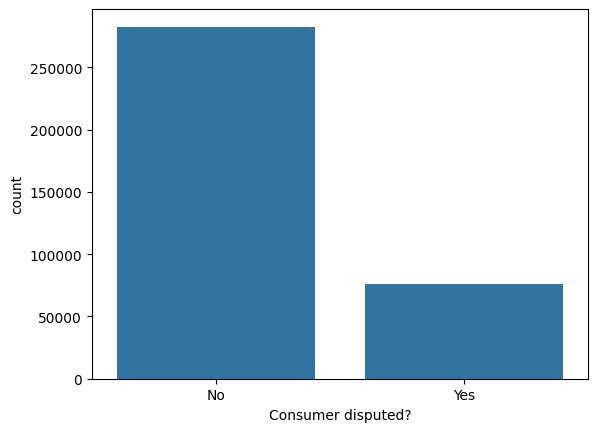

In [121]:
sns.countplot(data=train_df, x="Consumer disputed?")

Plot bar graph for the total no of disputes products-wise with help of seaborn

<Axes: xlabel='Consumer disputed?', ylabel='count'>

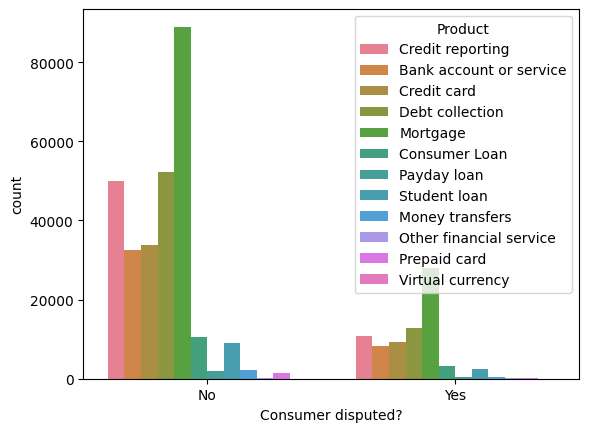

In [123]:
sns.countplot(x="Consumer disputed?", hue="Product", data=train_df)

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

Plot bar graph for the total no of disputes by State with Maximum Disputes

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Plot bar graph for the total no of disputes over Year Wise Complaints

Plot bar graph for the total no of disputes over Year Wise Disputes

Plot  bar graph for the top companies with highest complaints

"Days Held" Column Analysis(describe)

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

Drop Days Held with Negative Values

Text pre-processing
(It will be cover in upcoming calsses)

In [ ]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

Concate Dummy Variables and Drop the Original Columns

Calculating TF-IDF

In [ ]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

Replacing Issues_cleaned by Vectorized Issues

In [ ]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

observe train and test datasets

In [ ]:
# df_train.head()
# df_test.head()

Observe Shape of new Train and Test Datasets

Scaling the Data Sets (note:discard dependent variable before doing standardization)

Do feature selection with help of PCA

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


Split data into Train and Test datasets
(for test data use test excel file data)

Shapes of the datasets

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

Final Model and Prediction for test data file

Export Predictions to CSV